## 文本数据处理

In [1]:
data = [
    "I love the movie! It was amazing.",
    "The movie was boring and too long.",
    "What a fantastic experience watching this film.",
    "Terrible movie. It was too predictable.",
    "I enjoyed the movie, especially the visuals were stunning.",
    "The plot was dull, did not enjoy it.",
    "Absolutely loved it! Great actors and story.",
    "Not my cup of tea. The movie lacked substance.",
    "Amazing screenplay and direction. A masterpiece!",
    "The movie was okay, not very engaging though."
]

# 我一把把把把住了.

### 1.文本预处理
在进行任何分析之前，文本通常需要被清理和标准化。这可以包括转换为小写、删除停用词和标点符号等。

In [2]:
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))#定义停用词集合,从NLTK库中获取英文停用词

def preprocess_text(text): #定义文本预处理函数
    # 转换为小写
    text = text.lower()
    # 移除标点
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 分词
    words = word_tokenize(text)
    # 移除停用词和单字母词
    words = [word for word in words if word not in stop_words and len(word) > 1]
    return words

processed_data = [preprocess_text(text) for text in data]
print(processed_data)

[['love', 'movie', 'amazing'], ['movie', 'boring', 'long'], ['fantastic', 'experience', 'watching', 'film'], ['terrible', 'movie', 'predictable'], ['enjoyed', 'movie', 'especially', 'visuals', 'stunning'], ['plot', 'dull', 'enjoy'], ['absolutely', 'loved', 'great', 'actors', 'story'], ['cup', 'tea', 'movie', 'lacked', 'substance'], ['amazing', 'screenplay', 'direction', 'masterpiece'], ['movie', 'okay', 'engaging', 'though']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.特征提取
对于文本数据，我们常见的特征提取方法是词频（TF）和TF-IDF。在这里，我们使用词袋模型（Bag of Words）作为示例。

#### 1. Bag of Words (BoW)
词袋模型是文本数据的简单表示形式，其忽略了文本中词语的顺序和语法，只考虑词语的出现频次。在这个模型中，每个文档可以被表示为一个长向量，此向量的长度由语料库中的唯一词汇量决定。

每个文档的向量中，每个元素的数值表示对应词汇在该文档中的出现次数。例如，考虑以下两个文本：

    文本1: "the cat is on the table"

    文本2: "the dog is under the table"

如果词汇表是 ["the", "cat", "dog", "is", "on", "under", "table"]，则这两个文本的 BoW 表示为：

    文本1: [1, 1, 0, 1, 1, 0, 1]
    
    文本2: [1, 0, 1, 1, 0, 1, 1]

每个位置的数字代表词汇表中对应词汇在文本中的出现次数。

#### 2. Term Frequency (TF)
词频（TF）是衡量一个词在单一文档中出现的频率。这个数字是通过将某个词在文档中的出现次数除以文档中的总词数得到的。

例如，如果文档是100个词，并且“cat”这个词出现了3次，那么“cat”的TF就是 0.03。

这是一个标准化的词袋模型表示，可用于避免由于文档长度不同而引起的偏差。该值表示词条在文档中出现的频率。这是测量词在文档中出现得有多频繁。TF(t) 计算公式为：

   $$
   \text{TF}(t) = \left(\frac{\text{在某一类中词条 t 出现的次数}}{\text{该类中所有的词条数目}}\right)
   $$

#### 3. TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF 是一种用于信息检索与文本挖掘的常用加权技术。该统计方法用以评估字词对于一个文件集或一个语料库中的其中一份文件的重要性。其计算公式如下：

### 计算公式

1. **词频 (TF, Term Frequency)**，该值表示词条在文档中出现的频率。这是测量词在文档中出现得有多频繁。TF(t) 计算公式为：

   $$
   \text{TF}(t) = \left(\frac{\text{在某一类中词条 t 出现的次数}}{\text{该类中所有的词条数目}}\right)
   $$

2. **逆文档频率 (IDF, Inverse Document Frequency)**，这个数值是文档频率的逆。它有助于评估词语的通用性。即使在多个文档中频繁出现的词语可能就比较不重要。IDF(t) 是一个词条重要性增加的度量，计算公式为：

   $$
   \text{IDF}(t) = \log\left(\frac{\text{总文档数}}{\text{包含词条 t 的文档数目} + 1}\right)
   $$

   这里加1是为了避免分母为零（在不存在任何文档中包含词条t的情况下）。

3. **TF-IDF**，然后将这两个数值相乘，以得到一个词在一个文档中的总体重要性得分。计算公式为：

   $$
   \text{TF-IDF}(t) = \text{TF}(t) \times \text{IDF}(t)
   $$

### 总结

TF-IDF 值越大，表示词条对于文档的重要性越高。这种方法常用于文本挖掘、用户建模、内容推荐等多种场景。它非常有效地反映了文档具有代表性的关键词或短语。

In [3]:
from sklearn.feature_extraction.text import CountVectorizer #用于将文本数据转换为词频矩阵的工具

# 重新将处理过的文本数据转换回字符串格式
processed_texts = [" ".join(text) for text in processed_data]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_texts)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['absolutely' 'actors' 'amazing' 'boring' 'cup' 'direction' 'dull'
 'engaging' 'enjoy' 'enjoyed' 'especially' 'experience' 'fantastic' 'film'
 'great' 'lacked' 'long' 'love' 'loved' 'masterpiece' 'movie' 'okay'
 'plot' 'predictable' 'screenplay' 'story' 'stunning' 'substance' 'tea'
 'terrible' 'though' 'visuals' 'watching']
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0

### 3.数据可视化
我们可以可视化文本中单词的频率分布，这有助于理解数据集中最常见的话题。

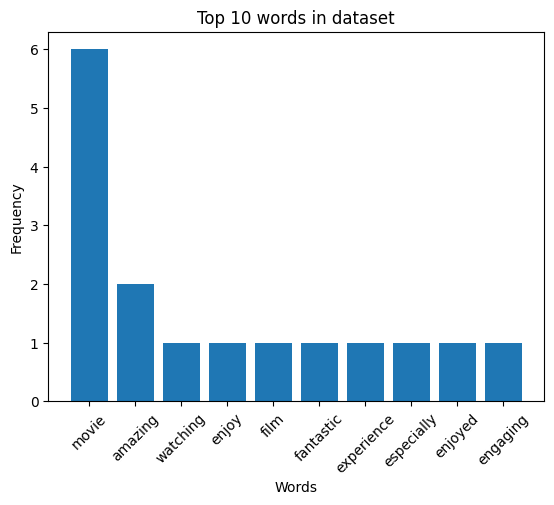

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 计算单词频率
word_freq = np.sum(X.toarray(), axis=0)
words = vectorizer.get_feature_names_out()

# 对单词频率进行排序
sorted_idx = np.argsort(word_freq)[::-1]
sorted_words = [words[idx] for idx in sorted_idx]
sorted_freq = word_freq[sorted_idx]

fig, ax = plt.subplots()
ax.bar(sorted_words[:10], sorted_freq[:10])  # 只显示前10个最频繁的单词
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 words in dataset')
plt.xticks(rotation=45)
plt.show()

### 4. Huggingface库

#### 1. 问答

In [6]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline

tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
model = AutoModelForQuestionAnswering.from_pretrained("microsoft/deberta-v3-large")

# 创建问答pipeline
qa_pipeline = pipeline("question-answering", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--microsoft--deberta-v3-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

ValueError: Couldn't instantiate the backend tokenizer from one of: 
(1) a `tokenizers` library serialization file, 
(2) a slow tokenizer instance to convert or 
(3) an equivalent slow tokenizer class to instantiate and convert. 
You need to have sentencepiece installed to convert a slow tokenizer to a fast one.

In [ ]:
# 提问和背景
context = "Hugging Face is a company based in New York City. Its technology is based on a transformers library."
question = "Where is Hugging Face based?"

# 使用模型
result = qa_pipeline(question=question, context=context)
print(result)

{'score': 0.0070789651945233345, 'start': 0, 'end': 34, 'answer': 'Hugging Face is a company based in'}


#### 2.文本回答

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# 加载模型和分词器
model1 = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-large")

# 创建pipeline
nlp = pipeline("text-classification", model=model1, tokenizer=tokenizer)

# 使用模型
text = "I love using transformers! They make machine learning much easier."
result = nlp(text)
print(result)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[{'label': 'LABEL_0', 'score': 0.5025989413261414}]
